<div class='alert alert-info alert-block' align='center'><h1>SPAM CLASSIFIER</h1></div>

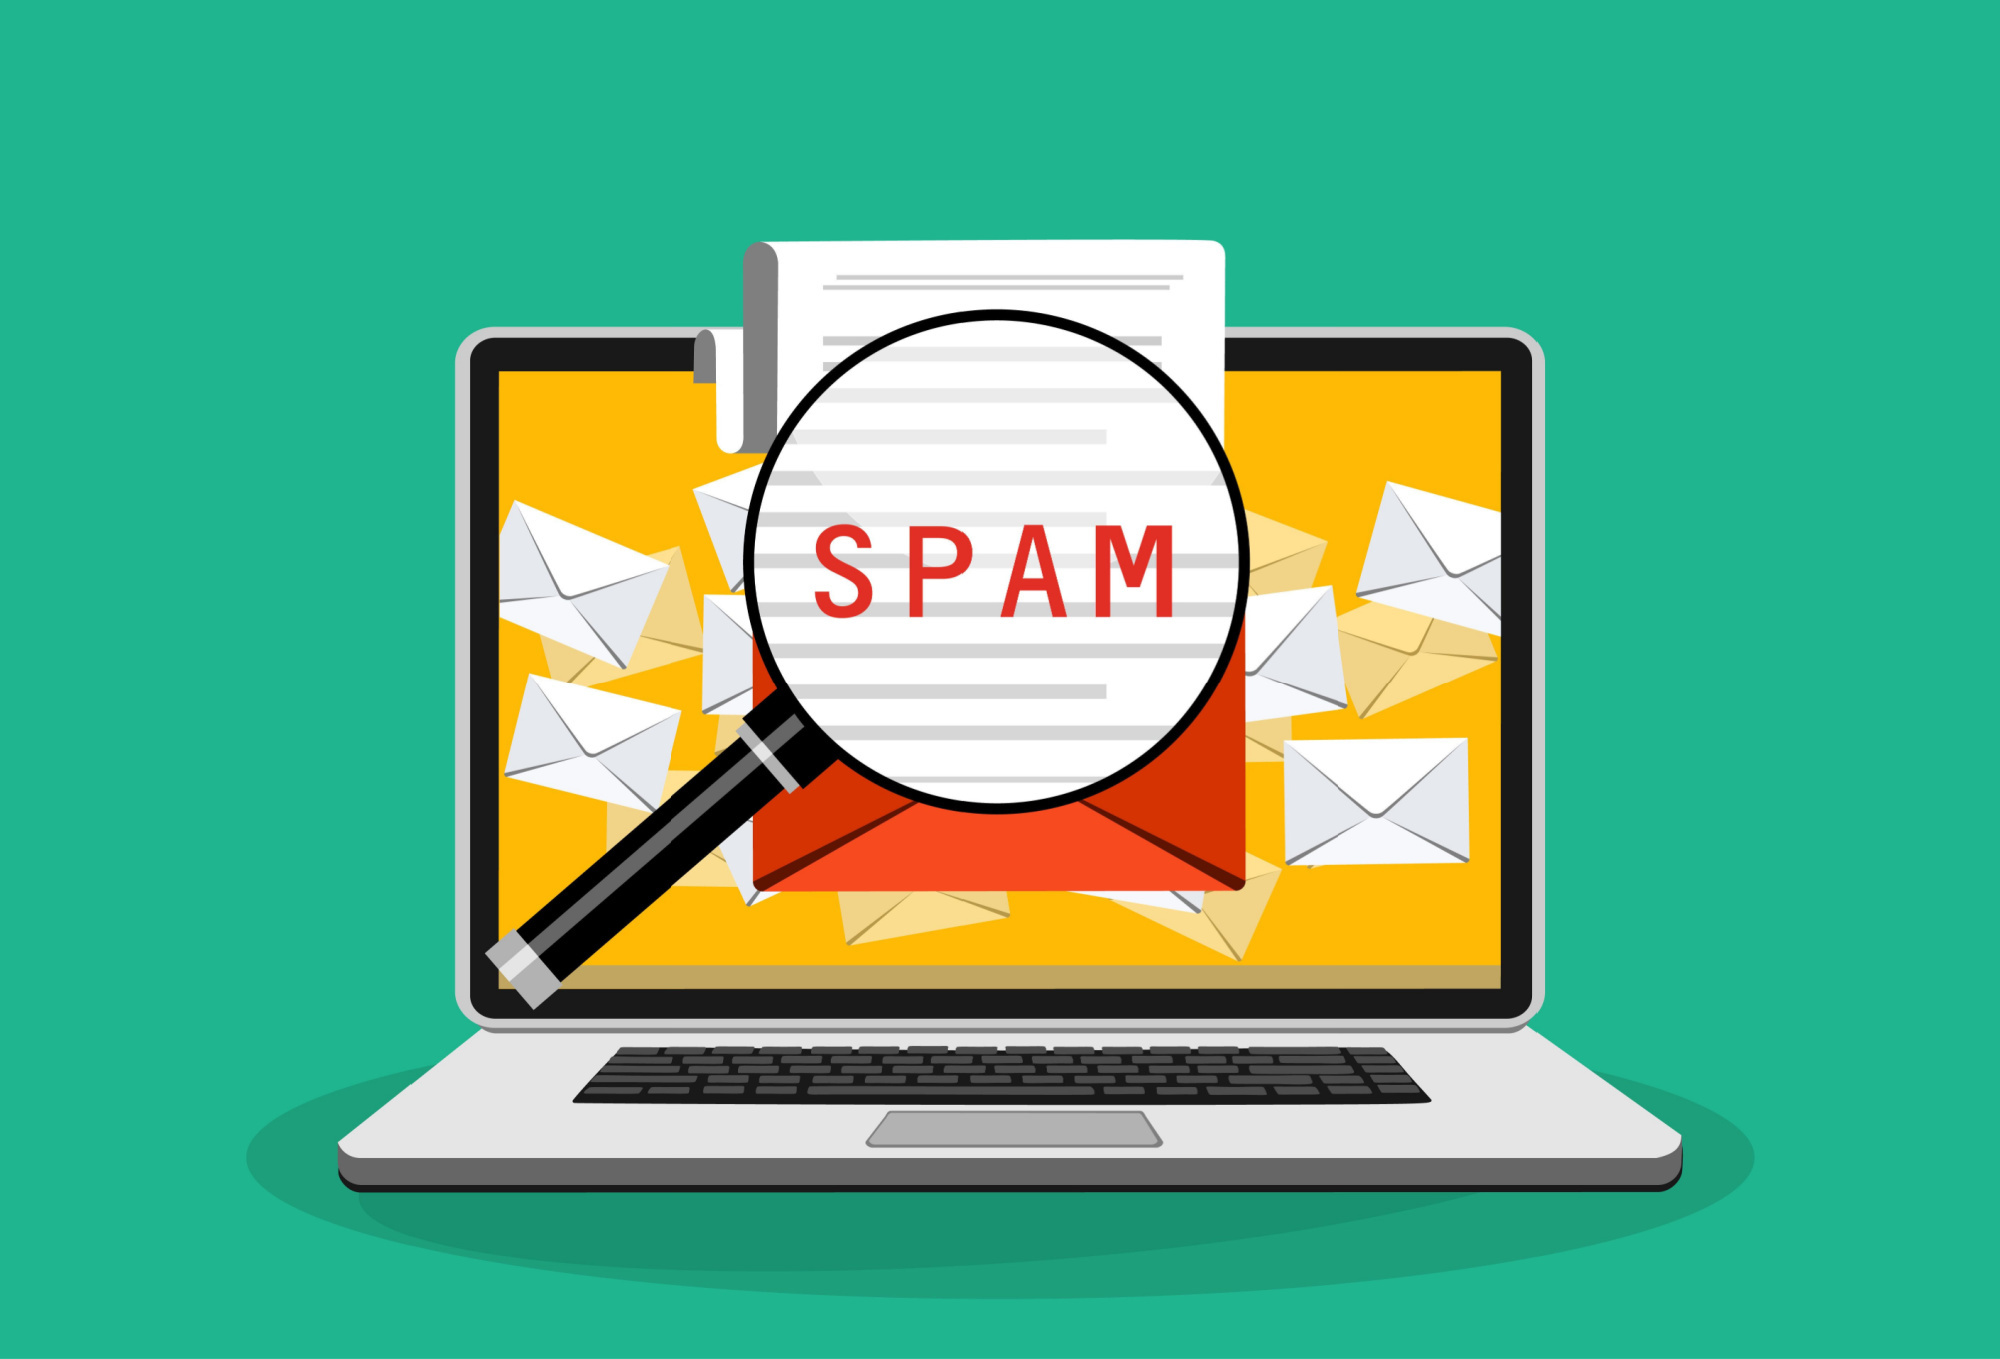

In [15]:
Image(r"C:\Users\shubh\Desktop\python\upgrad\Images\spam.jpg")

### Dataset Description

The dataset contains two columns:
1. **Type**(v1): A categorical variable indicating whether the message is "spam" or "ham" (not spam).
2. **Message**(v2): The actual text message.

The dataset is used to build a spam classifier using Natural Language Processing (NLP) techniques.


<div class='alert alert-info alert-block' align='center'><h3>Importing libraries and Understanding data</h3></div>

In [13]:
# importing libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import string
import os
import time

# importing scikit learn libraries  for modelling
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.naive_bayes import BernoulliNB ,GaussianNB , MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer

# importing funtion for prediction score 
from sklearn.metrics import accuracy_score , classification_report , roc_auc_score , confusion_matrix , ConfusionMatrixDisplay ,precision_score

# importing Natural language Processing libraries 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer ,WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud

from collections import Counter

# to import images
from IPython.display import Image

# to tackle warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# loading the dataset
data = pd.read_csv(r"spam.csv", encoding='latin1')

In [17]:
# fetching top 5 rows from dataset
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
# rows and columns in dataset
data.shape

(5572, 5)

In [21]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<div class='alert alert-info alert-block' align='center'><h1><b>Data Cleaning</b></h1></div>


In [24]:
# dropping unnecessary columns
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] 
data.drop(columns=columns,inplace=True)

In [26]:
# checking for null records in dataset
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [28]:
# Renaming columns name 
data.rename(columns={'v1':'Type','v2':'Message'},inplace=True)

In [30]:
# top 2 rows
data.head(2)

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [32]:
# checking for duplicate records
data.duplicated().sum()

403

In [33]:
# dropping duplicates records
data = data.drop_duplicates(keep='first')
data.shape

(5169, 2)

<div class = 'alert alert-block alert-info' align='center'><h1> Exploratory Data Analysis</h1></div>


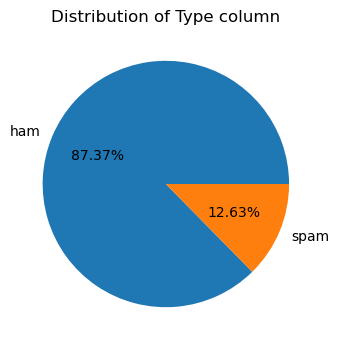

In [37]:
# Count percentage of Type column
plt.figure(figsize=(4,4))
value_count = data['Type'].value_counts(normalize=True)
plt.pie(value_count.values,labels=value_count.keys(),autopct='%0.2f%%')
plt.title('Distribution of Type column')
plt.show()

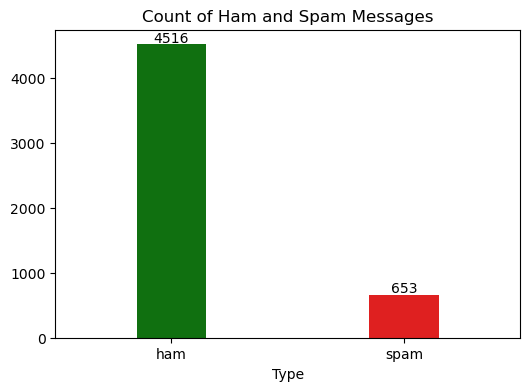

In [38]:

plt.figure(figsize=(6,4))
value_count = data['Type'].value_counts()

ax=sns.barplot(x=value_count.keys() , y=value_count.values,palette=['green','red'],width=0.3)
plt.title('Count of Ham and Spam Messages')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height()+100,
        int(p.get_height()),
        ha='center',
        va = 'center',
        fontsize=10
    )

plt.show()

In [39]:
# average length of message 

print('Average length of Text Message is {0:.0f}'.format(np.mean(data['Message'].apply(lambda x : len(x.split())))))

Average length of Text Message is 15


In [40]:
# Number of character present in message
data['Characters'] = data['Message'].apply(len)
data.head()

,Type,Message,Characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# Number of words present in data
data['Words'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x))) 
data.head()

,Type,Message,Characters,Words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
# Number of sentences present
data['Sentences'] = data['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,Type,Message,Characters,Words,Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
# statistical description of data
data.describe(include=np.number)

,Characters,Words,Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
# descriptive statistics of dataset for ham messages

data[data['Type']=='ham'].describe(include=np.number).round()

,Characters,Words,Sentences
count,4516.0,4516.0,4516.0
mean,70.0,17.0,2.0
std,56.0,13.0,1.0
min,2.0,1.0,1.0
25%,34.0,8.0,1.0
50%,52.0,13.0,1.0
75%,90.0,22.0,2.0
max,910.0,220.0,38.0


In [49]:
# descriptive statistics of dataset for spam messages

data[data['Type']=='spam'].describe(include=np.number).round()

,Characters,Words,Sentences
count,653.0,653.0,653.0
mean,138.0,28.0,3.0
std,30.0,7.0,1.0
min,13.0,2.0,1.0
25%,132.0,25.0,2.0
50%,149.0,29.0,3.0
75%,157.0,32.0,4.0
max,224.0,46.0,9.0


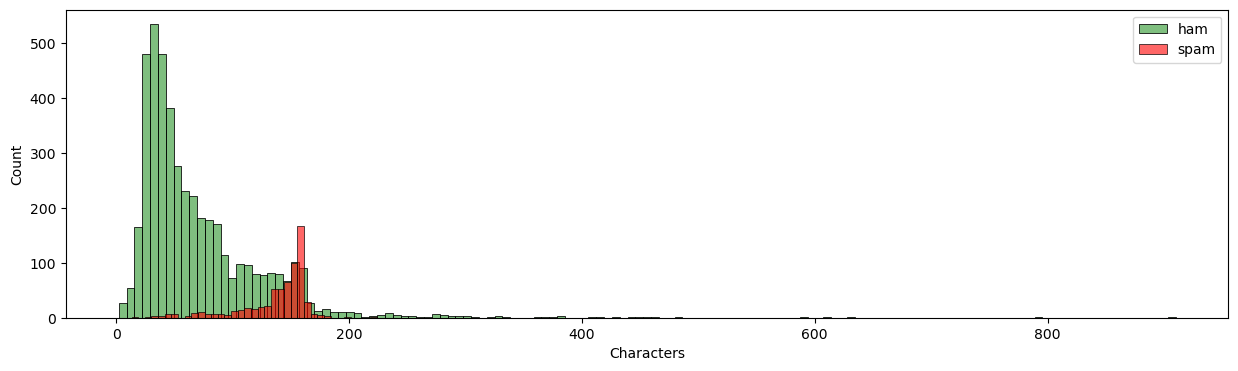

In [51]:
# creating viusal for Number of character in ham spam
plt.figure(figsize=(15,4))
sns.histplot(data[data['Type']=='ham'] , x = 'Characters' ,color='green' , alpha=0.5,label='ham')
sns.histplot(data[data['Type']=='spam'] , x = 'Characters' ,color='red',alpha=0.6,label='spam')
plt.legend()
plt.show()

##### Ham messages typically use fewer than 150 characters, while most spam messages exceed this limit.

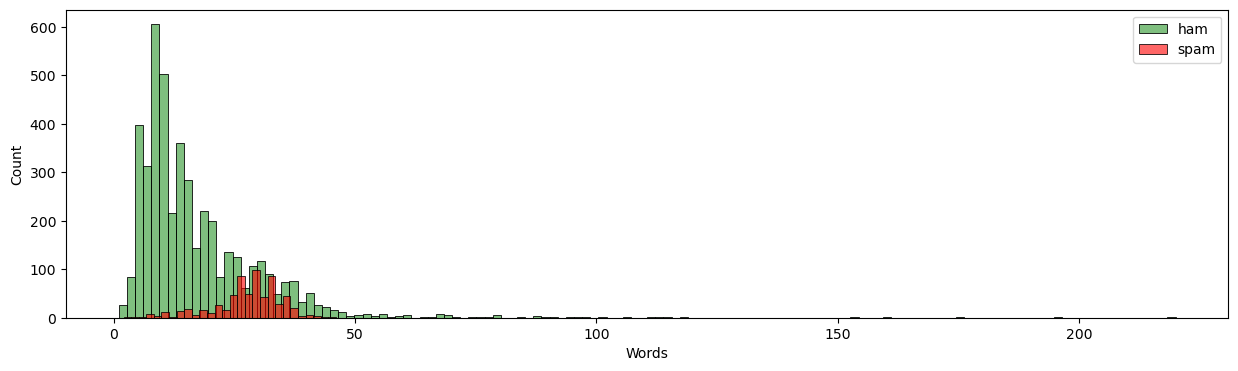

In [53]:
# creating viusal for Number of Words in ham spam
plt.figure(figsize=(15,4))
sns.histplot(data[data['Type']=='ham'] , x = 'Words' ,color='green' , alpha=0.5,label='ham')
sns.histplot(data[data['Type']=='spam'] , x = 'Words' ,color='red',alpha=0.6,label='spam')
plt.legend()
plt.show()

##### Ham messages typically use fewer than 25 words, while most spam messages exceed this limit.

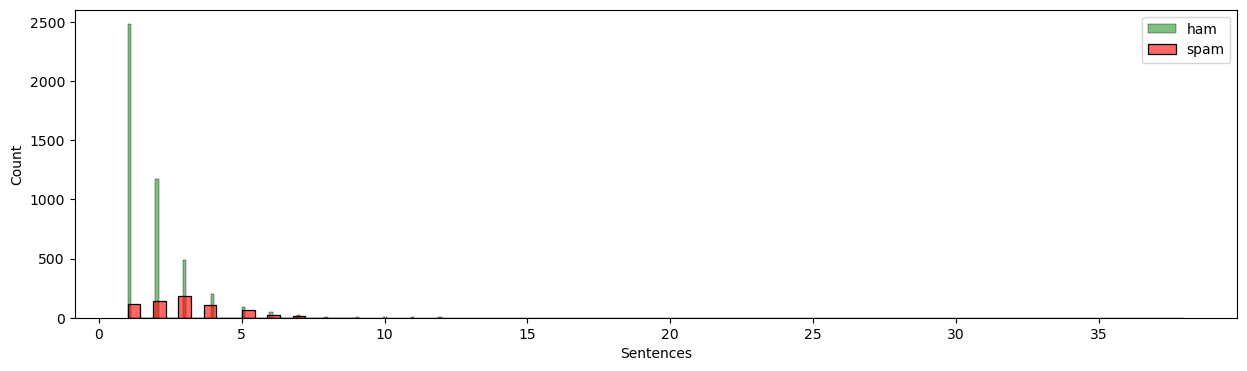

In [59]:
# creating viusal for Number of Sentences in ham spam
plt.figure(figsize=(15,4))
sns.histplot(data[data['Type']=='ham'] , x = 'Sentences' ,color='green' , alpha=0.5,label='ham')
sns.histplot(data[data['Type']=='spam'] , x = 'Sentences' ,color='red',alpha=0.6,label='spam')
plt.legend()
plt.show()

##### Ham messages uses moslty 1 or 2 sentences

In [61]:
# correlation matrix 
round(data.corr(numeric_only=True),2)

,Characters,Words,Sentences
Characters,1.00,0.97,0.62
Words,0.97,1.00,0.68
Sentences,0.62,0.68,1.00


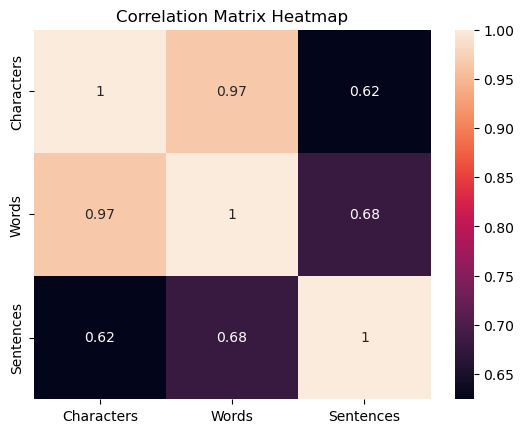

In [63]:
# Correlation Matrix Heatmap
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

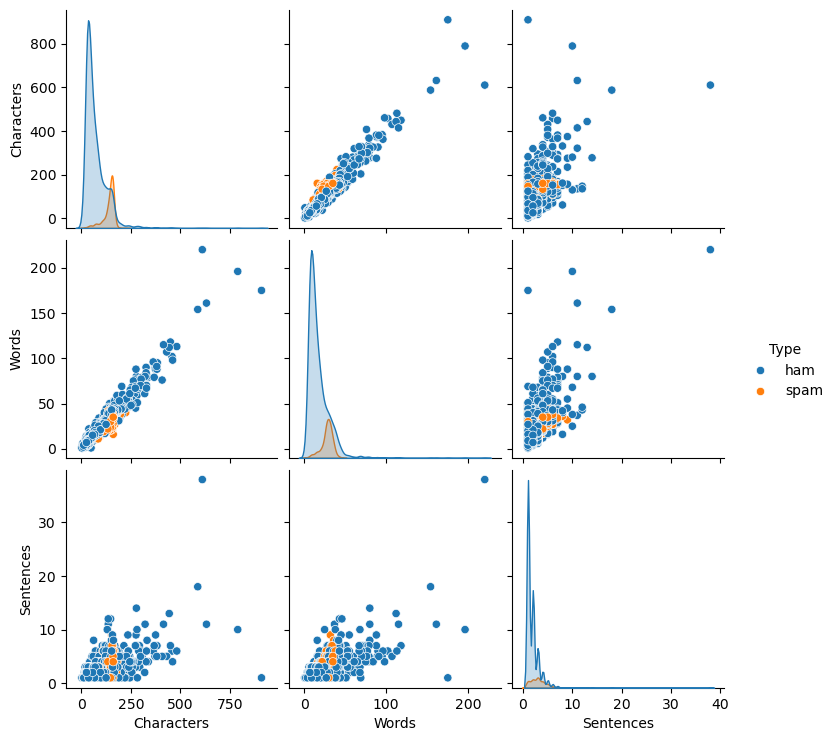

In [64]:

sns.pairplot(data,hue='Type')
plt.show()

<div class='alert alert-block alert-info' align='center'><h1><b>Data Preprocessing</b></h1></div>

In [68]:
# top 5 rows of dataset
data.head()

,Type,Message,Characters,Words,Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
# creating variable for porter Stemmer
ps = PorterStemmer()

In [72]:
# punctuation in string library

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [73]:
# creating funtion for text transformation to get clean message

def transform_text(text):
    # convert message into list of word
    text = text.lower()               
    text = nltk.word_tokenize(text)  

    # keeping only alpha numeric in dataset
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # removing stopwords and punctuation from messages
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # stemming the words
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [75]:
# applying above transfrom text function to message column
data['Clean_message'] = data['Message'].apply(transform_text)

In [82]:
# top 5 rows of data
data.head()

,Type,Message,Characters,Words,Sentences,Clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
# creating varaible for wordcloud 
wc = WordCloud(width=2500 , height=1500 ,min_font_size=10 ,background_color='white')

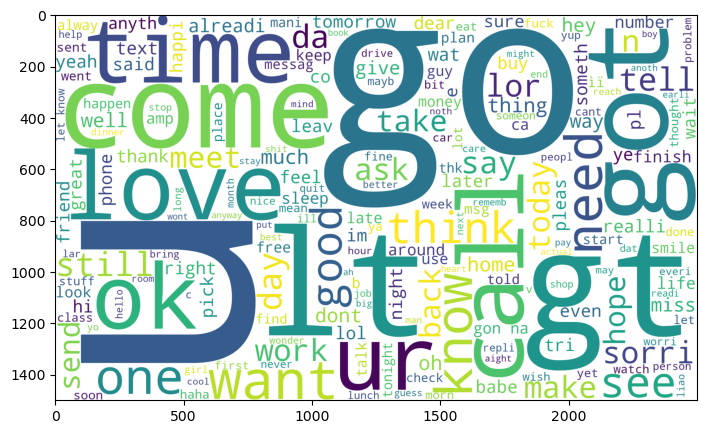

In [86]:
# Word Cloud for ham messages
plt.figure(figsize=(15,5))
spam_wc = wc.generate(data[data['Type']=='ham']['Clean_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

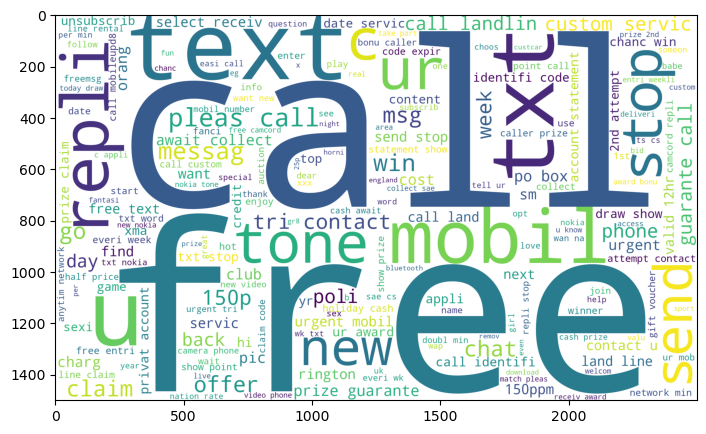

In [87]:
# Word cloud for spam messages
plt.figure(figsize=(15,5))
spam_wc = wc.generate(data[data['Type']=='spam']['Clean_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [88]:
# top 30 words used in ham messages
ham_corpus = []
for msg in data[data['Type']=='ham']['Clean_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [92]:
# length of ham corpus list
len(ham_corpus)

35404

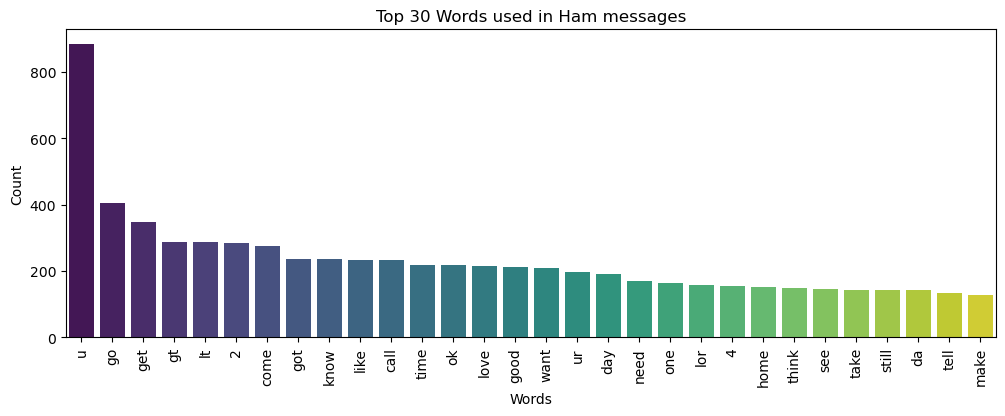

In [94]:
# plot for top 30 words used in ham messages
plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='viridis')
plt.xticks(rotation="vertical")
plt.title('Top 30 Words used in Ham messages')
plt.ylabel('Count')
plt.xlabel('Words')
plt.show()

In [96]:
# word count in spam messages
spam_corpus = []
for msg in data[data['Type']=='spam']['Clean_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
# number of words in spam messages
len(spam_corpus)

9939

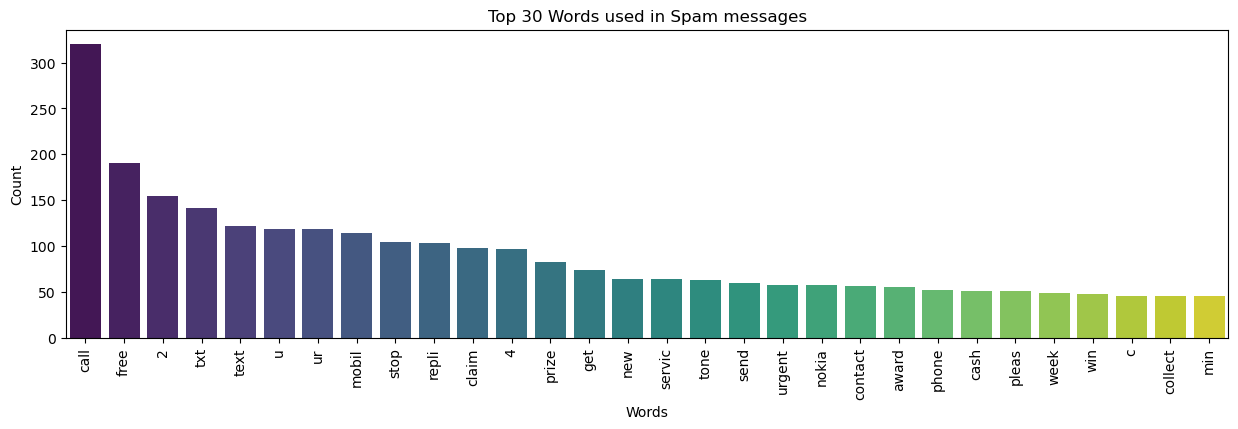

In [100]:
# top 30 words used in spam messages

plt.figure(figsize=(15,4))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='viridis')
plt.xticks(rotation="vertical")
plt.title('Top 30 Words used in Spam messages')
plt.ylabel('Count')
plt.xlabel('Words')
plt.show()

In [102]:
# Let's develope tri-gram for ham messages
text_pos = ' '.join(data.loc[data.Type == 'ham', 'Message'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for ham messages
Counter(text_trigrams_pos).most_common(30)

[(('I', 'want', 'to'), 22),
 (('I', 'miss', 'you'), 19),
 (('I', 'love', 'you'), 15),
 (('.', '.', '.'), 15),
 (('Do', 'have', 'a'), 14),
 (('let', 'me', 'know'), 14),
 (('give', 'me', 'a'), 14),
 (('Have', 'a', 'great'), 14),
 (('to', 'go', 'to'), 13),
 (('be', 'able', 'to'), 13),
 (('I', 'have', 'to'), 13),
 (('you', 'want', 'to'), 13),
 (('a', 'great', 'day.'), 13),
 (('Hope', 'you', 'are'), 13),
 (('on', 'the', 'way'), 12),
 (('I', 'need', 'you'), 12),
 (('How', 'are', 'you'), 12),
 (('What', 'are', 'you'), 11),
 (('I', 'am', 'in'), 11),
 (('Where', 'are', 'you'), 11),
 (('?', 'Are', 'you'), 10),
 (('?', 'Did', 'you'), 10),
 (('have', 'a', 'great'), 10),
 (('text', 'me', 'when'), 10),
 (('I', 'think', 'of'), 10),
 (('in', 'a', 'few'), 10),
 (('I', 'hope', 'your'), 10),
 (('when', 'you', 'get'), 10),
 (('u', 'wan', '2'), 10),
 (('let', 'you', 'know'), 9)]

In [104]:
# Let's develope tri-gram for ham Clean message without stopwords
text_pos = ' '.join(data.loc[data.Type == 'ham', 'Clean_message'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for ham messages
Counter(text_trigrams_pos).most_common(30)

[(('u', 'wan', '2'), 21),
 (('lt', 'gt', 'min'), 19),
 (('lt', 'decim', 'gt'), 18),
 (('happi', 'new', 'year'), 17),
 (('like', 'lt', 'gt'), 14),
 (('lt', 'gt', 'lt'), 13),
 (('gt', 'lt', 'gt'), 13),
 (('hi', 'hi', 'hi'), 11),
 (('sorri', 'call', 'later'), 8),
 (('wat', 'time', 'u'), 8),
 (('lt', 'gt', 'th'), 7),
 (('lt', 'gt', 'minut'), 7),
 (('wan', '2', 'go'), 7),
 (('x', 'x', 'x'), 7),
 (('lt', 'gt', 'dollar'), 6),
 (('kiss', 'across', 'sea'), 6),
 (('u', 'wan', 'na'), 6),
 (('lt', 'time', 'gt'), 6),
 (('lt', 'gt', 'rs'), 6),
 (('wot', 'u', '2'), 6),
 (('u', 'dun', 'wan'), 6),
 (('lt', 'gt', 'k'), 5),
 (('call', 'later', 'meet'), 5),
 (('hope', 'u', 'r'), 5),
 (('lt', 'gt', 'buck'), 5),
 (('good', 'afternoon', 'love'), 5),
 (('love', 'goe', 'day'), 5),
 (('gon', 'na', 'get'), 5),
 (('goodmorn', 'today', 'late'), 5),
 (('wish', 'great', 'day'), 5)]

In [106]:
# Let's develope tri-gram for spam messages
text_pos = ' '.join(data.loc[data.Type == 'spam', 'Message'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for spam message
Counter(text_trigrams_pos).most_common(30)

[(('have', 'won', 'a'), 20),
 (('prize', 'GUARANTEED.', 'Call'), 17),
 (('Account', 'Statement', 'for'), 15),
 (('trying', 'to', 'contact'), 14),
 (('cash', 'or', 'a'), 14),
 (('from', 'land', 'line.'), 14),
 (('2nd', 'attempt', 'to'), 14),
 (('is', 'the', '2nd'), 14),
 (('We', 'are', 'trying'), 13),
 (('are', 'trying', 'to'), 13),
 (('draw', 'shows', 'that'), 13),
 (('shows', 'that', 'you'), 13),
 (('attempt', 'to', 'contact'), 13),
 (('PRIVATE!', 'Your', '2003'), 13),
 (('Your', '2003', 'Account'), 13),
 (('2003', 'Account', 'Statement'), 13),
 (('å£1000', 'cash', 'or'), 12),
 (('selected', 'to', 'receive'), 12),
 (('you', 'have', 'won'), 12),
 (('Valid', '12hrs', 'only'), 12),
 (('shows', '800', 'un-redeemed'), 12),
 (('This', 'is', 'the'), 12),
 (('to', 'receive', 'a'), 11),
 (('that', 'you', 'have'), 11),
 (('land', 'line.', 'Claim'), 11),
 (('Do', 'you', 'want'), 11),
 (('You', 'have', 'won'), 10),
 (('This', 'is', 'our'), 10),
 (('URGENT!', 'Your', 'Mobile'), 9),
 (('are', 'sele

In [108]:
# Let's develope tri-gram for spam messages without stopwords
text_pos = ' '.join(data.loc[data.Type == 'spam', 'Clean_message'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for spam message
Counter(text_trigrams_pos).most_common(30)

[(('prize', 'guarante', 'call'), 19),
 (('repli', 'call', '08000930705'), 14),
 (('privat', '2003', 'account'), 13),
 (('2003', 'account', 'statement'), 13),
 (('call', 'custom', 'servic'), 12),
 (('draw', 'show', 'prize'), 12),
 (('show', 'prize', 'guarante'), 12),
 (('camcord', 'repli', 'call'), 12),
 (('land', 'line', 'claim'), 12),
 (('show', '800', 'point'), 12),
 (('800', 'point', 'call'), 12),
 (('bonu', 'caller', 'prize'), 11),
 (('anytim', 'network', 'min'), 11),
 (('urgent', 'tri', 'contact'), 10),
 (('cash', 'await', 'collect'), 10),
 (('750', 'anytim', 'network'), 9),
 (('holiday', 'cash', 'await'), 9),
 (('free', 'entri', '2'), 8),
 (('match', 'pleas', 'call'), 8),
 (('call', 'mobileupd8', '08000839402'), 8),
 (('urgent', 'mobil', 'number'), 8),
 (('caller', 'prize', '2nd'), 8),
 (('prize', '2nd', 'attempt'), 8),
 (('2nd', 'attempt', 'contact'), 8),
 (('everi', 'wk', 'txt'), 8),
 (('await', 'collect', 'sae'), 8),
 (('collect', 'sae', 'cs'), 8),
 (('stop', 'text', 'call'), 

In [110]:
words = ' '.join(data.loc[data.Type == 'spam', 'Clean_message'].values)
words = nltk.word_tokenize(words)

In [112]:
def text_preprocess(mess):
  nonpunc = "".join([char for char in mess if char not in string.punctuation])
  clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]
  return clean_mess

data['word_processed'] = data['Message'].apply(text_preprocess)

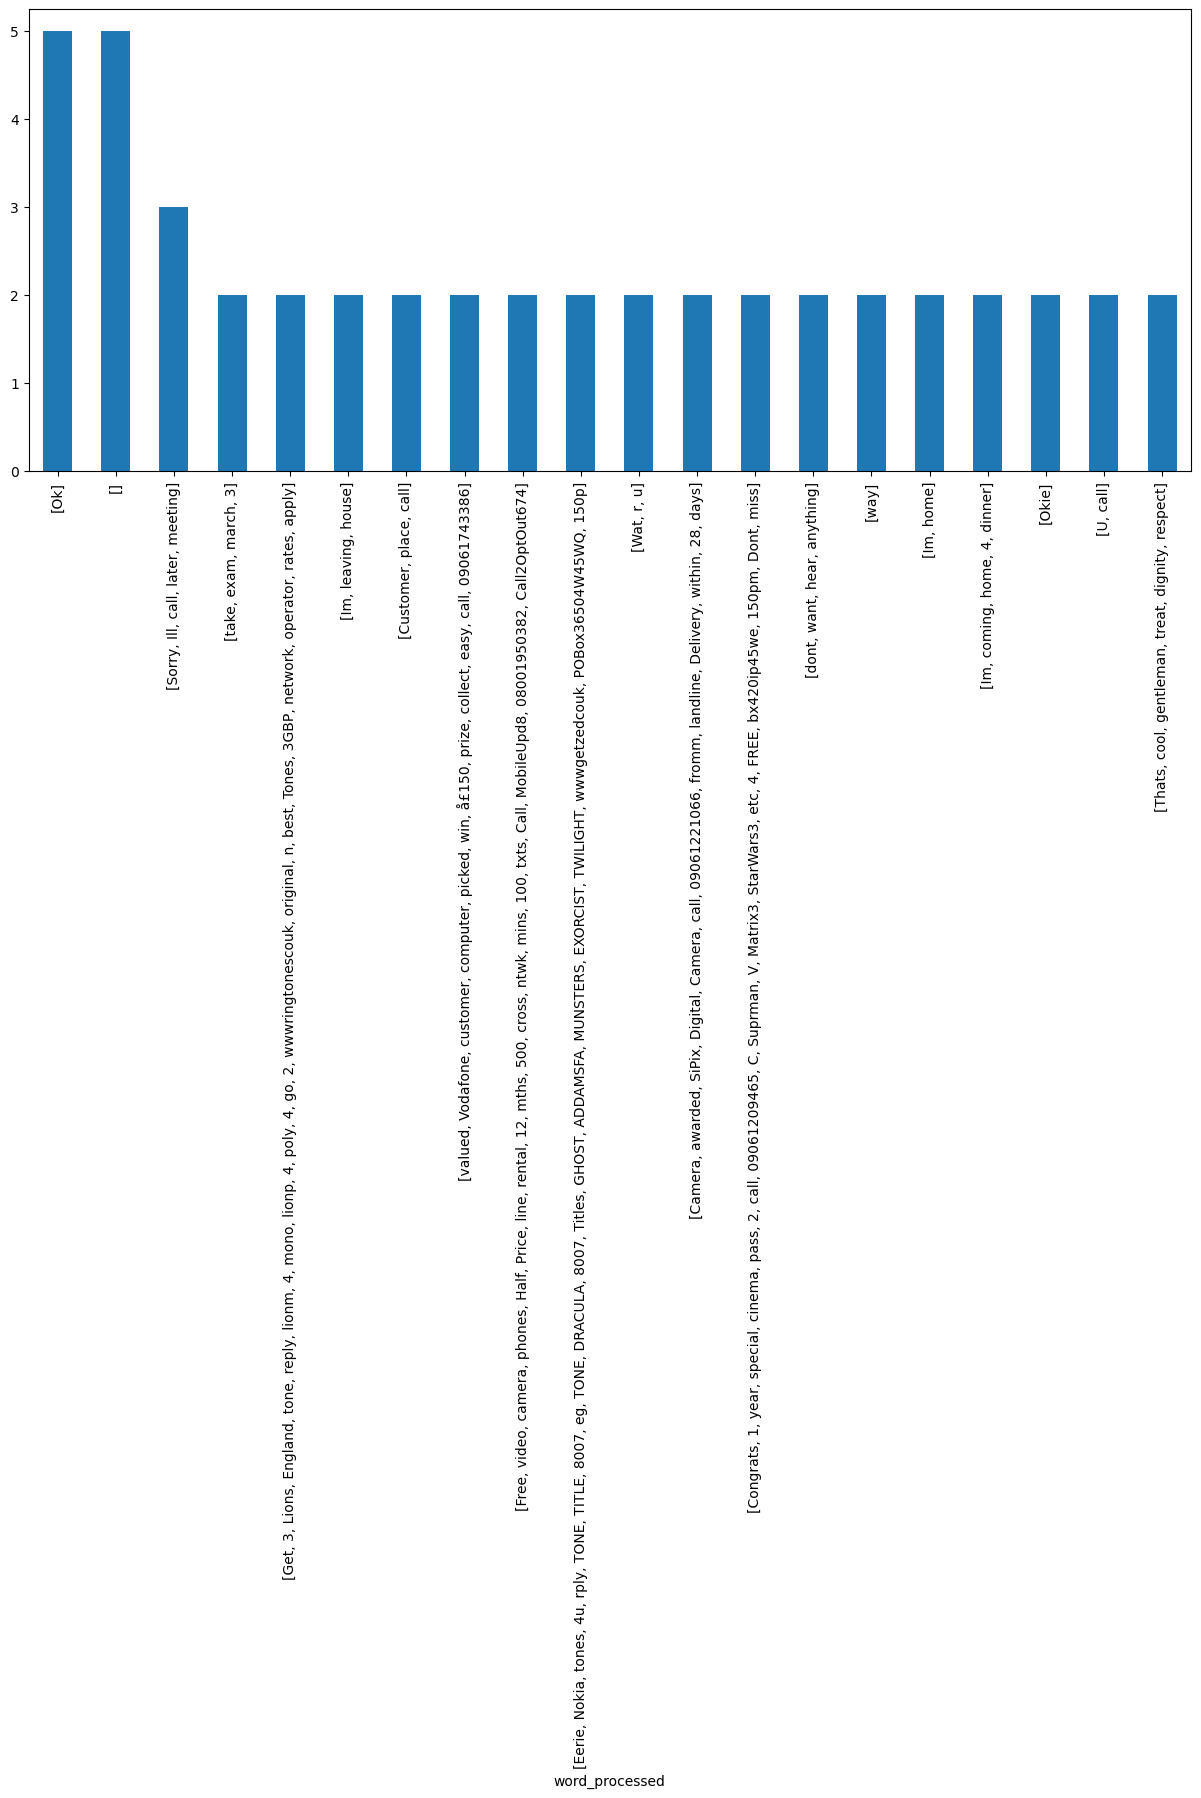

In [113]:
plt.figure(figsize=(15,6))
data['word_processed'].value_counts()[:20].plot(kind = 'bar')
plt.show()

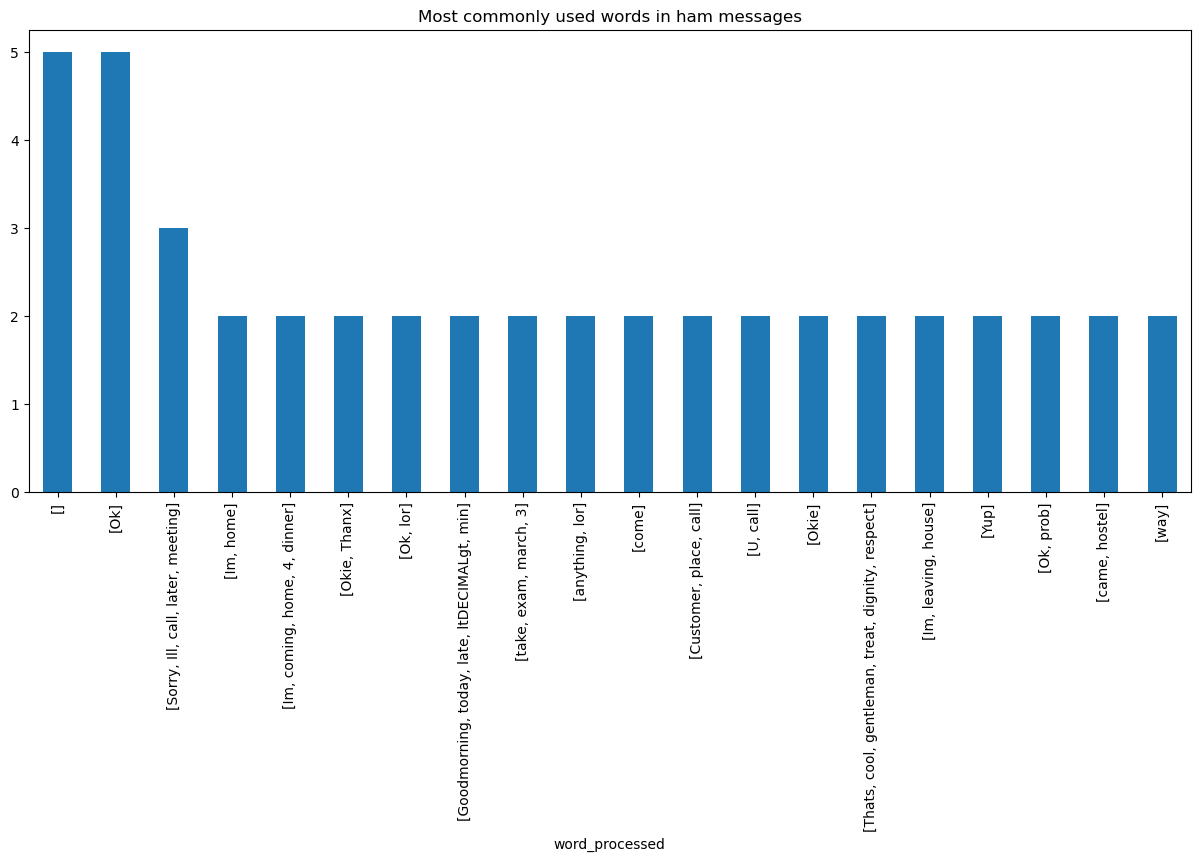

In [114]:
# visuals for Most commonly used words in ham messages
plt.figure(figsize=(15,6))
data[data['Type']=='ham']['word_processed'].value_counts()[:20].plot(kind = 'bar')
plt.title('Most commonly used words in ham messages')
plt.show()

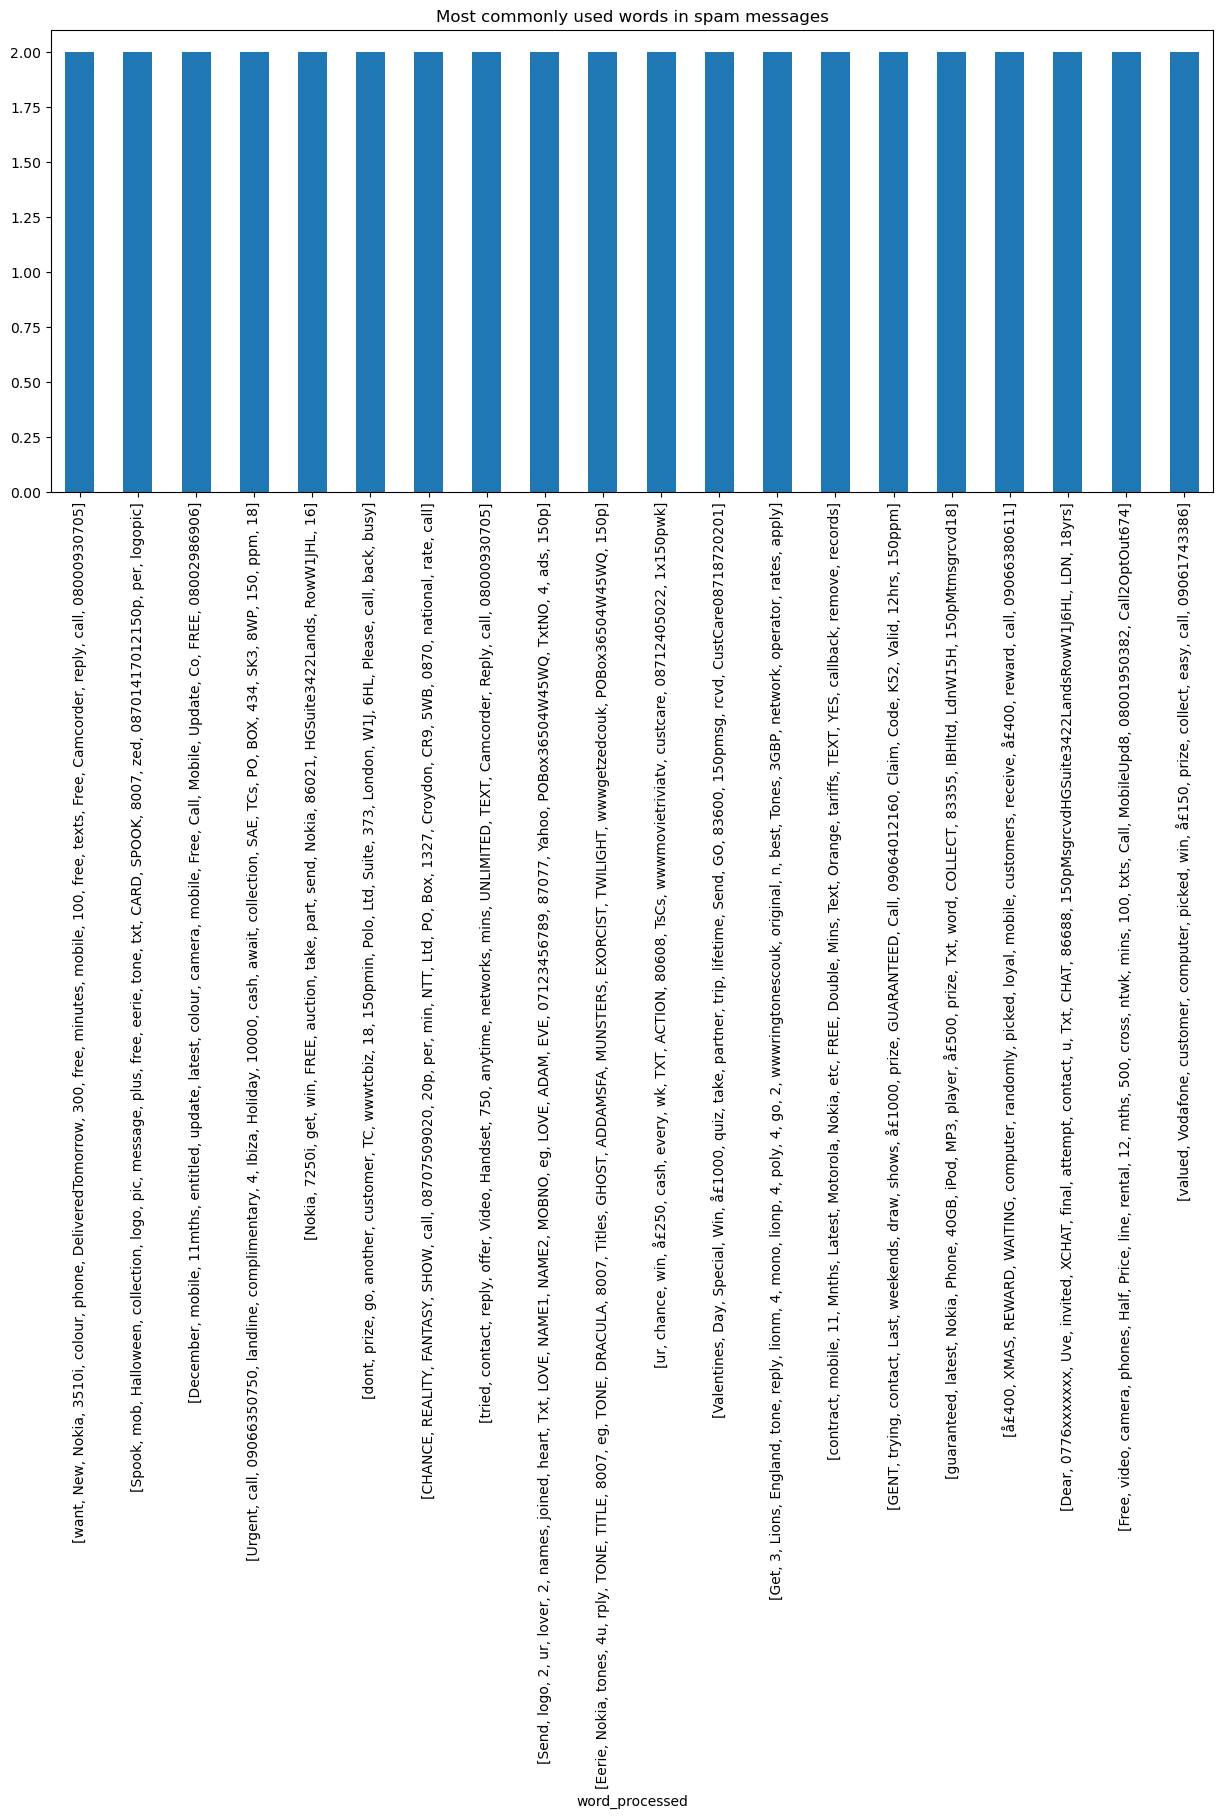

In [115]:
# visuals for Most commonly used words in spam messages
plt.figure(figsize=(15,6))
data[data['Type']=='spam']['word_processed'].value_counts()[:20].plot(kind = 'bar')
plt.title('Most commonly used words in spam messages')
plt.show()

<div class='alert alert-info alert-block' align ='center'><h3>Model Building</h3></div>

In [121]:
# creating variable for countvectorizer and Term frequency Inverse document frequency
cv = CountVectorizer()

In [123]:
data.head()

,Type,Message,Characters,Words,Sentences,Clean_message,word_processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"[Nah, dont, think, goes, usf, lives, around, t..."


In [125]:
# Encoding Type target column 
# ham:0 
# spam:1
data['Type'] = data['Type'].map({'ham':0,'spam':1})
y=data['Type']

In [127]:
# fitting and transform  countvectorizer to clean message 
transformed = cv.fit_transform(data['Clean_message'])

In [128]:
# unique words in messages
len(cv.vocabulary_)

6708

In [131]:
print(f"Number of None Zero elements : {transformed.nnz}\n")

print(f"Shape after transformed (rows , columns) : {transformed.shape}")

Number of None Zero elements : 40628

Shape after transformed (rows , columns) : (5169, 6708)


In [132]:
# checking for sparsity in data
sparsity = (100.0* transformed.nnz/(transformed.shape[0]*transformed.shape[1]))
print(round(sparsity))

0


In [133]:
# Term frequency Inverse Document Frequency
tfidf = TfidfTransformer()

tfidf_matrix = tfidf.fit_transform(transformed)

# Output the shape of the TF-IDF matrix
print(f"Shape of TF-IDF Matrix: {tfidf_matrix.shape}")

Shape of TF-IDF Matrix: (5169, 6708)


In [137]:
# Convert sparse matrix to dense for easier inspection
dense_matrix = tfidf_matrix.todense()

# View TF-IDF values for the first document
print(dense_matrix[0])  # Row for the first document

[[0. 0. 0. ... 0. 0. 0.]]


In [139]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
# Get feature names (words)
feature_names = cv.get_feature_names_out()

# Get TF-IDF scores for the first document
first_doc = tfidf_matrix[0].toarray()[0]

# Pair words with their scores
word_scores = list(zip(feature_names, first_doc))

# Sort by importance
word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

print(word_scores)

[('amor', 0.3494753148234608), ('jurong', 0.3494753148234608), ('buffet', 0.33347753286779225), ('bugi', 0.2947785370438732), ('cine', 0.2947785370438732), ('la', 0.2947785370438732), ('crazi', 0.2726986806633527), ('avail', 0.2674301481540794), ('world', 0.24396575023927825), ('point', 0.23886765162365067), ('great', 0.1955214807781884), ('wat', 0.19319990619456656), ('got', 0.1619205835698969), ('go', 0.1400355689928803), ('008704050406', 0.0), ('0089', 0.0), ('0121', 0.0), ('01223585236', 0.0), ('01223585334', 0.0), ('0125698789', 0.0), ('02', 0.0), ('0207', 0.0), ('02073162414', 0.0), ('02085076972', 0.0), ('021', 0.0), ('050703', 0.0), ('0578', 0.0), ('07008009200', 0.0), ('07046744435', 0.0), ('07090201529', 0.0), ('07090298926', 0.0), ('07099833605', 0.0), ('07123456789', 0.0), ('0721072', 0.0), ('07732584351', 0.0), ('07734396839', 0.0), ('07742676969', 0.0), ('07753741225', 0.0), ('0776xxxxxxx', 0.0), ('07786200117', 0.0), ('077xxx', 0.0), ('078', 0.0), ('07801543489', 0.0), (

In [143]:
X_train , X_test , y_train , y_test = train_test_split(transformed , y , test_size=0.2 , random_state=5)
print('Shape of X_train data ',X_train.shape)
print('Shape of y_train data ',y_train.shape)
print('Shape of X-test data ',X_test.shape)
print('Shape of y_test data ',y_test.shape)

Shape of X_train data  (4135, 6708)
Shape of y_train data  (4135,)
Shape of X-test data  (1034, 6708)
Shape of y_test data  (1034,)


In [145]:
# creating object for naive bayes modelling
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [146]:
# Convert to dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

#### Gaussian Naive Bayes

In [150]:
# fitting the model
gnb.fit(X_train_dense,y_train)

# predicting the test data
y_pred1 = gnb.predict(X_test_dense)
print('Accuracy Score' , accuracy_score(y_test , y_pred1)*100,'\n')
print('Confusion Matrix\n',confusion_matrix(y_test , y_pred1),'\n')
print('Precision Score',precision_score(y_test , y_pred1)*100,'\n')

Accuracy Score 85.97678916827853 

Confusion Matrix
 [[776 129]
 [ 16 113]] 

Precision Score 46.69421487603306 



#### Multinomial Naive Bayes

In [152]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score' , accuracy_score(y_test , y_pred2)*100,'\n')
print('Confusion Matrix\n',confusion_matrix(y_test , y_pred2),'\n')
print('Precision Score',precision_score(y_test , y_pred2)*100,'\n')

Accuracy Score 96.90522243713733 

Confusion Matrix
 [[884  21]
 [ 11 118]] 

Precision Score 84.89208633093526 



#### Bernoulli Naive Model

In [155]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score' , accuracy_score(y_test , y_pred3)*100,'\n')
print('Confusion Matrix\n',confusion_matrix(y_test , y_pred3),'\n')
print('Precision Score',precision_score(y_test , y_pred3)*100,'\n')

Accuracy Score 96.90522243713733 

Confusion Matrix
 [[900   5]
 [ 27 102]] 

Precision Score 95.32710280373831 



##### We get best result for BernoulliNB followed by MultinomialNB Model

<div class='alert alert-info alert-block' align='center'><h3>Trying Other Models</h3></div>

In [162]:
# Models
models = {
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB" : BernoulliNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=23),
    "BaggingClassifier": BaggingClassifier(random_state=23),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=23),
    "RandomForestClassifier": RandomForestClassifier(random_state=23),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=23),
    "XGBClassifier": XGBClassifier(random_state=23),
    "LogisticRegression": LogisticRegression(solver="liblinear")
}

# Parameter Grids
param_grids = {
    "SVC": {
        "kernel": ["sigmoid", "rbf", "linear"],
        "gamma": [0.1, 0.5, 1.0, 10.0],
        "C": [0.1, 1, 10, 100]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    "MultinomialNB": {
        "alpha": [0.5, 1.0, 1.5, 2.0],
        "fit_prior": [True, False]
    },
    "BernoulliNB":{
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
        'binarize': [0.0, 0.5, 1.0, None]  
    },
    "DecisionTreeClassifier": {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    },
    "AdaBoostClassifier": {
        "n_estimators": [10, 50, 100],
        "learning_rate": [0.1, 0.5, 1.0, 1.5]
    },
    "BaggingClassifier": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.7, 1.0],
        "max_features": [0.5, 0.7, 1.0]
    },
    "ExtraTreesClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    },
    "RandomForestClassifier": {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    },
    "GradientBoostingClassifier": {
        "n_estimators": [10, 50, 100],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
        "max_depth": [3, 5, 10]
    },
    "XGBClassifier": {
        "n_estimators": [10, 50, 100],
        "learning_rate": [0.01, 0.1, 0.5, 1.0],
        "max_depth": [3, 5, 10]
    },
    "LogisticRegression": {
        "penalty": ["l1", "l2"],
        "C": [0.1, 1, 10, 100]
    }
}

In [164]:
model_param_grid = {name : {'model':models[name],'param_grid':param_grids[name]} for name in models}
model_param_grid

{'SVC': {'model': SVC(),
  'param_grid': {'kernel': ['sigmoid', 'rbf', 'linear'],
   'gamma': [0.1, 0.5, 1.0, 10.0],
   'C': [0.1, 1, 10, 100]}},
 'KNeighborsClassifier': {'model': KNeighborsClassifier(),
  'param_grid': {'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan', 'minkowski']}},
 'MultinomialNB': {'model': MultinomialNB(),
  'param_grid': {'alpha': [0.5, 1.0, 1.5, 2.0], 'fit_prior': [True, False]}},
 'BernoulliNB': {'model': BernoulliNB(),
  'param_grid': {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
   'binarize': [0.0, 0.5, 1.0, None]}},
 'DecisionTreeClassifier': {'model': DecisionTreeClassifier(),
  'param_grid': {'max_depth': [3, 5, 10, None],
   'criterion': ['gini', 'entropy']}},
 'AdaBoostClassifier': {'model': AdaBoostClassifier(random_state=23),
  'param_grid': {'n_estimators': [10, 50, 100],
   'learning_rate': [0.1, 0.5, 1.0, 1.5]}},
 'BaggingClassifier': {'model': BaggingClassifier(random_state=23),
  'param_grid': 

In [166]:
# using random search method for hypertuning

results=[]

for name , mp in model_param_grid.items():  

    random_search = RandomizedSearchCV(estimator =mp["model"],param_distributions=mp['param_grid'],cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
    random_search.fit(X_train,y_train)
    
    y_pred = random_search.predict(X_test)
    
    results.append({'Model':name,
                    'Best_param':random_search.best_params_,
                    'Best_score':random_search.best_score_
                   })
# printing the results
for result in results :
    print(f"Name of the model {result['Model']}")
    print(f"Name of the model {result['Best_param']}")
    print(f"Name of the model {result['Best_score']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Name of the model SVC
Name of the model {'kernel': 'linear', 'gamma': 1.0, 'C': 1}
Name of the model 0.9758162031438935
Name of the model KNeighborsClassifier
Name of the model {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski'}
Name of the model 0.9194679564

##### Among all the models, the BernoulliNB model gives the best results, followed by Logistic Regression, MultinomialNB, and SVC.

In [168]:
### Trying on test data these 4 best models

In [170]:
# Bernoulli Naive Model
tunned_model = BernoulliNB(binarize= 0.0, alpha= 0.1)

# fitting the model
tunned_model.fit(X_train_dense,y_train)

# prediction 
y_pred = tunned_model.predict(X_test_dense)

# checking the accuracy of the model
print('Accuracy Score ',accuracy_score(y_test,y_pred))
print('Precision Score ',precision_score(y_test,y_pred))

Accuracy Score  0.9777562862669246
Precision Score  0.9140625


In [171]:
# Support Vector Classifier Model
tunned_model = SVC(kernel= 'linear', gamma= 0.5, C= 1)

# fitting the model
tunned_model.fit(X_train_dense,y_train)

# prediction 
y_pred = tunned_model.predict(X_test_dense)

# checking the accuracy of the model
print('Accuracy Score ',accuracy_score(y_test,y_pred))
print('Precision Score ',precision_score(y_test,y_pred))

Accuracy Score  0.9864603481624759
Precision Score  1.0


In [172]:
# Logistic Regression Model
tunned_model = LogisticRegression(penalty='l2', C= 100)

# fitting the model
tunned_model.fit(X_train_dense,y_train)

# prediction 
y_pred = tunned_model.predict(X_test_dense)

# checking the accuracy of the model
print('Accuracy Score ',accuracy_score(y_test,y_pred))
print('Precision Score ',precision_score(y_test,y_pred))

Accuracy Score  0.9835589941972921
Precision Score  0.9912280701754386


In [173]:
# Multinomial Naive Bayes
tunned_model = MultinomialNB(fit_prior= True,alpha= 2.0)

# fitting the model
tunned_model.fit(X_train_dense,y_train)

# prediction 
y_pred = tunned_model.predict(X_test_dense)

# checking the accuracy of the model
print('Accuracy Score ',accuracy_score(y_test,y_pred))
print('Precision Score ',precision_score(y_test,y_pred))

Accuracy Score  0.9729206963249516
Precision Score  0.8914728682170543


<div class='alert alert-info alert-block' align='center'><h3>Conclusion </h3></div>

After testing all four models on the test data, the **SVC** model provides the best accuracy and precision score.